## Using KNN on the Social Network Ads dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [3]:
sna=pd.read_csv('../Data Set/Social_Network_Ads.csv')
sna.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
sna=sna.iloc[:,1:]
sna.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
lencoder=LabelEncoder()
sna['Gender']=lencoder.fit_transform(sna['Gender'])

scaler=StandardScaler()
X=sna.iloc[:,0:3].values
X=scaler.fit_transform(X)
Y=sna.iloc[:,-1].values

In [6]:
sna.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [8]:
X_train.shape

(320, 3)

In [9]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.85

### Find out the best neighbors

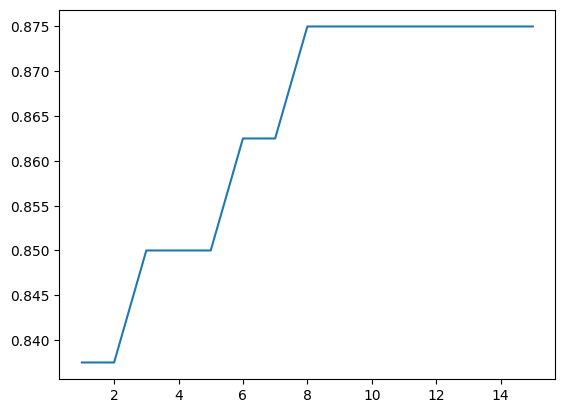

In [11]:
scores=[]
for i in range(1,16):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    
plt.plot(range(1,16),scores)

### The best neighbor is 8

In [12]:
knn1=KNeighborsClassifier(n_neighbors=8)
knn1.fit(X_train,y_train)
y_pred1=knn.predict(X_test)
accuracy_score(y_test,y_pred1)

0.875